In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN, BorderlineSMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats


df = pd.read_csv('/content/Creditcard_data.csv')

**First step: Visualization of the data**


In [ ]:
def class_distribution(y): #Simply counting the number of samples in each class
    counts = y.value_counts()
    distribution = counts/len(y)
    return distribution

def plot_class_distribution(y): #Bar chart to visualize the distribution of classes
    plt.figure(figsize=(8,6))
    perct = y.value_counts(normalize = True)*100

    sns.barplot(x = perct.index, y = perct.values)
    plt.title('Class Distr. (percentage)')
    plt.ylabel('Percentage')
    plt.xlabel('Class')
    plt.show()

def imbalance_ratio(y): #Finding the imbalance ratio
    counts = y.value_counts()
    ratio = counts.max()/counts.min()
    return ratio

def gini_coefficient(y):#Finds the gini coefficient, a measure of statistical dispersion
    counts = y.value_counts()
    p = counts/len(y)
    gini = 1-sum(p**2)
    return gini

In [ ]:
y = df['Class']
print(y)

0      0
1      1
2      0
3      0
4      0
      ..
767    0
768    0
769    0
770    0
771    0
Name: Class, Length: 772, dtype: int64


In [ ]:
class_dist = class_distribution(y)
print("Class Distribution: ")
print(class_dist)

Class Distribution: 
0    0.988342
1    0.011658
Name: Class, dtype: float64


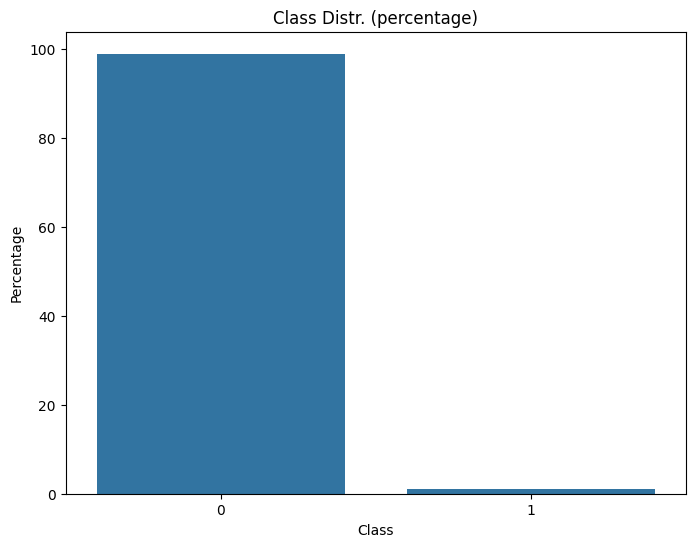

In [ ]:
plot_class_distribution(y)


In [ ]:
imbal_ratio = imbalance_ratio(y)
print(f"Imbalance Ratio: {imbal_ratio}")

gini_coeff = gini_coefficient(y)
print(f'Gini Coefficient: {gini_coeff}')

Imbalance Ratio: 84.77777777777777
Gini Coefficient: 0.02304424279846451


**Sampling:**
**Oversampling:**
**Random Oversampling:** balance the class distribution by randomly duplicating the instances of the minority class
**SMOTE:** Generates synthetic samples by focusing on the minority samples
**Undersampling:**
**Random Undersampling:** balance the class distribution by randomly duplicating the instances of the majority class
**Tomek Links:** Identifies and remove instances that are considered ambiguous or near the decision boundary between classes
**Near miss:** Identifies instances which are close to instances from minority class, aiming to retain the instances that are more difficult to classify correctly

In [ ]:
# Identify the target variable
target_variable = df.columns[-1]

Undersampling- We will don't do this because else we will loose a large amount of data and we will not be able to apply different modelling techniques.

In [ ]:
# Balance the dataset using RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(df.drop(target_variable, axis=1), df[target_variable])

In [ ]:
# Split features and target variable
X = X_resampled
y = y_resampled

In [ ]:
# Define TOPSIS function
def topsis_score(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return ((accuracy + precision + recall + f1) / 4) * 100

In [ ]:
# Define ML models
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),  # Set probability=True for AUC-ROC
    'LogisticRegression': LogisticRegression(random_state=42),
    'KNN': KNeighborsClassifier(),
    'GradientBoosting': GradientBoostingClassifier(random_state=42)
}

In [ ]:
# Define sampling techniques
samplings = {
    'RandomUnderSampling': RandomUnderSampler(random_state=42),
    'RandomOverSampling': RandomOverSampler(random_state=42),
    'SMOTE': SMOTE(random_state=42),
    'ADASYN': ADASYN(random_state=42),
    'BorderlineSMOTE': BorderlineSMOTE(random_state=42)
}


In [ ]:
# Results list
results_list = []

In [ ]:
# Apply different sampling techniques on different ML models
for model_name, model in models.items():
    for sampling_name, sampling in samplings.items():
        X_resampled, y_resampled = sampling.fit_resample(X, y)
        X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        topsis = topsis_score(y_test, y_pred)

        results_list.append({
            'Model': model_name,
            'Sampling Technique': sampling_name,
            'TOPSIS Score': topsis
        })

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
# Create a DataFrame from the results list
results_df = pd.DataFrame(results_list)

In [ ]:
results_df

,Model,Sampling Technique,TOPSIS Score
0,RandomForest,RandomUnderSampling,100.000000
1,RandomForest,RandomOverSampling,100.000000
2,RandomForest,SMOTE,100.000000
3,RandomForest,ADASYN,100.000000
4,RandomForest,BorderlineSMOTE,100.000000
5,SVM,RandomUnderSampling,69.535161
6,SVM,RandomOverSampling,66.437557
7,SVM,SMOTE,66.437557
8,SVM,ADASYN,66.437557
9,SVM,BorderlineSMOTE,66.437557


In [ ]:
# Pivot the DataFrame for tabulating into a table
table_df = results_df.pivot(index='Model', columns='Sampling Technique', values='TOPSIS Score')

In [ ]:
table_df

Sampling Technique,ADASYN,BorderlineSMOTE,RandomOverSampling,RandomUnderSampling,SMOTE
Model,,,,,
GradientBoosting,100.000000,100.000000,100.000000,99.381132,100.000000
KNN,98.771370,98.771370,98.771370,98.170423,98.771370
LogisticRegression,92.852421,92.852421,92.852421,91.048420,92.852421
RandomForest,100.000000,100.000000,100.000000,100.000000,100.000000
SVM,66.437557,66.437557,66.437557,69.535161,66.437557


In [ ]:
output_file_path = 'C:\\Users\\goyal\\Downloads\\Sampling_Results.csv'
table_df.to_csv(output_file_path, index=False)

print(f"DataFrame saved to {'Sampling_Results'}")

DataFrame saved to Sampling_Results
